TRABAJO PRACTICO DE REDES NEURONALES

Para iniciar con el tp se importan las funciones pandas,numpy y sklearn
luego de seleccionar un dataframe comenzamos a trabajar con el, eliminando los valores atipicos y normalizando para poder hacer la red neuronal

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
all_data = pd.read_csv('data.csv',index_col=0)
all_data.head()


,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,simetria_media,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactacion_peor,concavidad_peor,concavidad_punto_peor,simetria_peor,fractal_dimension_peor
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


seleccionamos las 30 columnas que se usaran para la red neuronal.
filtraremos los valores atipicos recorriendo cada columna  eliminado esos valores.
esto se realiza a traves de la distancia inter cuantil que se obtiene restando q1 y q3 
con esto cualquier valor de la columna si es menor a (columna < (q1 - 1.5 * iqr)) sera un valor atipico 
y si es mayor (columna > (q3 + 1.5 * iqr)) tambien lo sera.
con dropna se eliminan todos los valores NaN por ultimo se normalizo por el max

In [100]:
all_data = pd.read_csv('data.csv')
columna=all_data.iloc[:, 2:32].columns 
def filtrar_atipicos(columna ):
    q1 = columna.quantile(0.25)
    q3 = columna.quantile(0.75)
    iqr = q3 - q1
    filtro_atipicos = (columna < (q1 - 1.5 * iqr)) | (columna > (q3 + 1.5 * iqr))
    return columna[~filtro_atipicos]

# Recorrer las columnas seleccionadas del DataFrame
selected_columns = all_data.iloc[:, 2:32].columns  # Selecciona las columnas 2 a 32
for columna in selected_columns:
    if pd.api.types.is_numeric_dtype(all_data[columna]):
        all_data[columna] = filtrar_atipicos(all_data[columna])

# Eliminar los valores NaN de las columnas seleccionadas
all_data = all_data.dropna()

# Normalizar por el máximo las columnas seleccionadas
all_data[selected_columns] = (all_data[selected_columns]-all_data[selected_columns].mean())/all_data[selected_columns].std()

# Guardar los datos modificados en el mismo archivo CSV
all_data.to_csv('data2.csv', index=False)
# Guardar los datos modificados en el mismo archivo CSV
all_data.to_csv('data2.csv', index=False)

# Imprimir los datos normalizados
print("Datos normalizados por el máximo:")
print(all_data.to_string())




Datos normalizados por el máximo:
            id  diagnostico  radio_medio  textura_media  perimetro_medio  area_media  suavidad_media  compactacion_media  concavidad_media  puntos_concavos_medios  simetria_media  dimension_fractal_media  radio_se  textura_se  perimetro_se   area_se  suavidad_se  compactacion_se  concavidad_se  concavidad_puntos_se  simetria_se  fractal_dimension_se  radio_peor  textura_peor  perimetro_peor  area_peor  suavidad_peor  compactacion_peor  concavidad_peor  concavidad_punto_peor  simetria_peor  fractal_dimension_peor
7     84458202            0     0.002250       0.474280         0.103435   -0.089127        2.243641            2.320387          0.711260                0.912898        2.160534                 3.069451  1.853954    0.845998      1.573647  1.248532     1.299848         0.975758       0.087779              1.098569    -0.690890              1.838343    0.520537      0.535692        0.453959   0.401625       1.913025           1.510042         0

vemos como estan correlacionados los datos

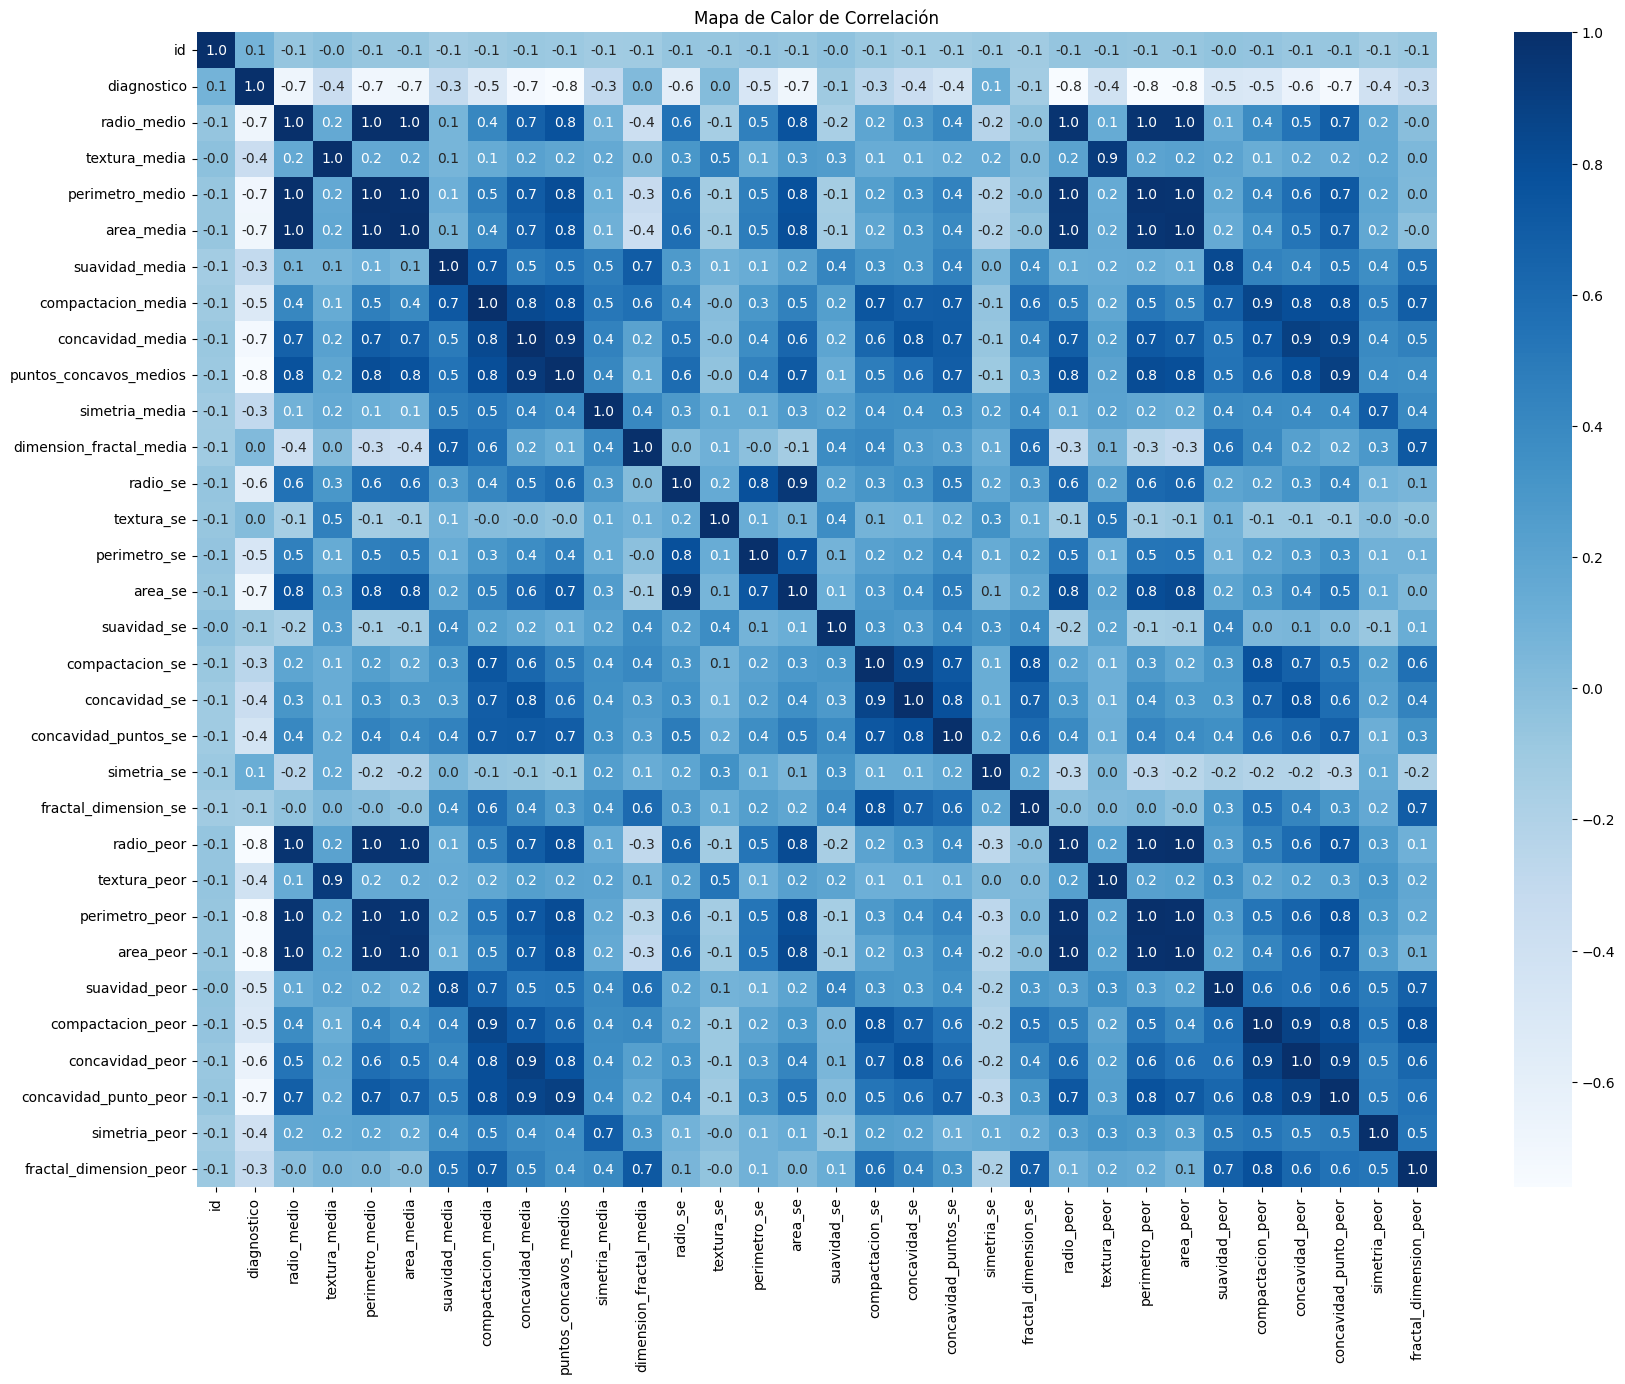

In [101]:
data = pd.read_csv('data2.csv')
correlation_matrix = data.corr()

# Crea el mapa de calor utilizando Seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='Blues')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [102]:
all_data.describe()

,id,diagnostico,radio_medio,textura_media,perimetro_medio,area_media,suavidad_media,compactacion_media,concavidad_media,puntos_concavos_medios,...,radio_peor,textura_peor,perimetro_peor,area_peor,suavidad_peor,compactacion_peor,concavidad_peor,concavidad_punto_peor,simetria_peor,fractal_dimension_peor
count,1.660000e+02,166.000000,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,...,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02
mean,2.324947e+07,0.734940,-2.354208e-16,5.216711e-16,-1.054043e-15,-2.728741e-16,-2.782246e-16,-1.712151e-16,7.490661e-17,9.630850e-17,...,8.774775e-16,1.712151e-16,9.416831e-16,-1.070094e-17,-2.889255e-16,5.350472e-17,-2.354208e-16,-2.782246e-16,-3.103274e-16,-8.881784e-16
std,1.016528e+08,0.442701,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.670000e+03,0.000000,-1.454328e+00,-1.738944e+00,-1.432618e+00,-1.211308e+00,-2.373340e+00,-1.835130e+00,-1.190242e+00,-1.367186e+00,...,-1.449661e+00,-1.790192e+00,-1.477628e+00,-1.193861e+00,-2.067073e+00,-1.545001e+00,-1.375516e+00,-1.888401e+00,-2.262634e+00,-1.729854e+00
25%,8.738300e+05,0.000000,-6.876533e-01,-7.364764e-01,-6.864262e-01,-6.655181e-01,-6.903815e-01,-7.842957e-01,-7.266925e-01,-6.835418e-01,...,-6.927581e-01,-7.691255e-01,-6.975012e-01,-6.525517e-01,-7.285490e-01,-7.321957e-01,-7.888194e-01,-7.141897e-01,-7.104781e-01,-7.173660e-01
50%,9.055385e+05,1.000000,-2.529624e-01,-1.288620e-01,-2.315651e-01,-2.939351e-01,-2.028105e-01,-1.462354e-01,-2.892313e-01,-2.840986e-01,...,-2.170823e-01,-3.006340e-02,-2.212771e-01,-2.717463e-01,2.821333e-02,-1.841032e-01,-1.986669e-01,-2.399957e-01,-6.272823e-02,-8.590718e-02
75%,8.813051e+06,1.000000,3.778062e-01,6.225097e-01,3.689615e-01,2.773192e-01,6.706006e-01,7.039390e-01,4.846370e-01,6.276492e-01,...,3.212670e-01,5.937521e-01,4.129859e-01,2.341778e-01,6.738262e-01,5.522530e-01,7.228535e-01,8.043560e-01,7.182964e-01,4.247423e-01
max,9.113205e+08,1.000000,2.840709e+00,2.769286e+00,3.010637e+00,3.102552e+00,2.554770e+00,3.030536e+00,3.976662e+00,3.669189e+00,...,2.857133e+00,2.491391e+00,3.066870e+00,3.229484e+00,3.119115e+00,3.492874e+00,3.861174e+00,2.437929e+00,2.665620e+00,3.383690e+00


Definimos las entradas y salidas de la red y utilizamos 1/3 de los datos para entrenamiento y prueba

In [103]:
from sklearn.model_selection import train_test_split

# Cargar el archivo CSV
all_data = pd.read_csv('data2.csv')

# Seleccionar las columnas de entrada (características) y salida (objetivo)

all_inputs=all_data[['radio_medio', 'textura_media', 'perimetro_medio',
                                                'area_media', 'suavidad_media', 'compactacion_media',
                                                'concavidad_media', 'puntos_concavos_medios', 'simetria_media',
                                                'dimension_fractal_media', 'radio_se', 'textura_se', 'perimetro_se',
                                                'area_se', 'suavidad_se', 'compactacion_se', 'concavidad_se',
                                                'concavidad_puntos_se', 'simetria_se', 'fractal_dimension_se',
                                                'radio_peor', 'textura_peor', 'perimetro_peor', 'area_peor',
                                                'suavidad_peor', 'compactacion_peor', 'concavidad_peor',
                                                'concavidad_punto_peor', 'simetria_peor','fractal_dimension_peor']]

all_outputs = all_data.diagnostico
# Dividir en un conjunto de entrenamiento y uno de prueba
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_outputs, test_size=1/3)




Asignamos pesos y sesgos aleatorios para la capa oculta y de salida 

In [104]:

n = X_train.shape[0] # número de registros de entrenamiento
w_hidden = np.random.rand(30, 30) * 2 - 1
w_output = np.random.rand(1, 30) * 2 - 1

b_hidden = np.random.rand(30, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1


Le damos un seed para que mantenga los pesos y sesgos fijos una vez que logramos la mejor presicion
definimos la funcion de activacion

In [105]:
np.random.seed(7)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


En esta parte hacemos forward propagation  que calcula la presicion de las predicciones echas en un conjunto de pruebas

In [106]:
# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions.values >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.7500000000000004


In [107]:
w_hidden = np.random.rand(30, 30)
#print('w_hidden = ', w_hidden)



In [108]:
w_output = np.random.rand(1, 30)
#print('w_output = ', w_output)

In [109]:
b_hidden = np.random.rand(30, 1)
print('b_hidden = ', b_hidden)



b_hidden =  [[0.40160074]
 [0.4357113 ]
 [0.239876  ]
 [0.76959737]
 [0.20222761]
 [0.03864652]
 [0.70011363]
 [0.74250114]
 [0.23875936]
 [0.17340592]
 [0.58053128]
 [0.91963043]
 [0.2539833 ]
 [0.5400042 ]
 [0.26437822]
 [0.74164778]
 [0.46709639]
 [0.37895635]
 [0.65614058]
 [0.53141954]
 [0.20114935]
 [0.41621224]
 [0.95649351]
 [0.80113521]
 [0.5121086 ]
 [0.66046325]
 [0.14237142]
 [0.41319337]
 [0.89481637]
 [0.18812034]]


In [110]:
b_output = np.random.rand(1, 1)
print('b_output = ', b_output)

b_output =  [[0.98192133]]


Aqui hace las deribadas que usaremos para la red

In [111]:
from sympy import *

W1, W2, B1, B2, A1, A2, Z1, Z2, X, Y = \
    symbols('W1 W2 B1 B2 A1 A2 Z1 Z2 X Y')

# Derivada de la función costo respecto A2
C = (A2 - Y)**2
dC_dA2 = diff(C, A2)
print("dC_dA2 = ", dC_dA2) # 2*A2 - 2*Y

# Derivada de A2 respecto de Z2
logistic = lambda x: 1 / (1 + exp(-x))
_A2 = logistic(Z2)
dA2_dZ2 = diff(_A2, Z2)
print("dA2_dZ2 = ", dA2_dZ2) # exp(-Z2)/(1 + exp(-Z2))**2

# Derivada de Z2 respecto a A1
_Z2 = A1*W2 + B2
dZ2_dA1 = diff(_Z2, A1)
print("dZ2_dA1 = ", dZ2_dA1) # W2

# Derivada de Z2 respecto a W2
dZ2_dW2 = diff(_Z2, W2)
print("dZ2_dW2 = ", dZ2_dW2) # A1

# Derivada de Z2 respecto a B2
dZ2_dB2 = diff(_Z2, B2)
print("dZ2_dB2 = ", dZ2_dB2) # 1

#Derivada de A1 respecto de Z1
relu = lambda x: Max(x, 0)
_A1 = relu(Z1)

d_relu = lambda x: x > 0 # Pendiente es 1 para los positivos, 0 para los negativos
dA1_dZ1 = d_relu(Z1)
print("dA1_dZ1 = ", dA1_dZ1) # Z1 > 0

# Derivada de Z1 respecto a W1
_Z1 = X*W1 + B1
dZ1_dW1 = diff(_Z1, W1)
print("dZ1_dW1 = ", dZ1_dW1) # X

# Derivada de Z1 respecto a B1
dZ1_dB1 = diff(_Z1, B1)
print("dZ1_dB1 = ", dZ1_dB1) # 1

dC_dA2 =  2*A2 - 2*Y
dA2_dZ2 =  exp(-Z2)/(1 + exp(-Z2))**2
dZ2_dA1 =  W2
dZ2_dW2 =  A1
dZ2_dB2 =  1
dA1_dZ1 =  Z1 > 0
dZ1_dW1 =  X
dZ1_dB1 =  1


En esta seccion sera el entrenamiento de la red.
L sera el paso o tasa de aprendizaje. en este caso utilice 0,01
y las iteraciones use 1200 debido a que son pocos los datos a recorrer
Las funciones de activacion son relu y logistic
usamos forward_prop para las activaciones de las capas, backward_prop  calcula las derivadas en funcion del costo y descenso de gradiente para entrenarla

In [128]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

L = 0.02 # La tasa de aprendizaje

w_hidden = np.random.rand(30, 30) * 2 - 1
w_output = np.random.rand(1, 30) * 2 - 1

b_hidden = np.random.rand(30, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1
# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))
# Ejecutar entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
   Z1 = w_hidden @ X + b_hidden
   A1 = relu(Z1)                                                
   Z2 = w_output @ A1 + b_output
   A2 = logistic(Z2)
   return Z1, A1, Z2, A2

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2
# Devuelve pendientes para pesos y sesgos usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1
    
    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T
    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2
    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1
    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T
    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(2200):
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
  
    X_sample = X_train.iloc[idx].values.transpose()
    Y_sample = Y_train.iloc[idx].values

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2

Presicion de la red ya entrenada

In [129]:
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions.values >= 0.5).flatten().astype(int), Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])
print("ACCURACY: ", accuracy)

ACCURACY:  0.9107142857142866


Aqui recorro todo el csv2 para predecir los casos de cancer

In [130]:
import pandas as pd
def predict_probability(radio_medio, textura_media, perimetro_medio,
                                               area_media, suavidad_media, compactacion_media,
                                               concavidad_media, puntos_concavos_medios,
                                               simetria_media, dimension_fractal_media,
                                               radio_se, textura_se, perimetro_se, area_se,
                                               suavidad_se, compactacion_se, concavidad_se,
                                               concavidad_puntos_se, simetria_se,
                                               fractal_dimension_se, radio_peor, textura_peor,
                                               perimetro_peor, area_peor, suavidad_peor,
                                               compactacion_peor, concavidad_peor,
                                               concavidad_punto_peor, simetria_peor,
                                               fractal_dimension_peor):
 X = np.array([[radio_medio, textura_media, perimetro_medio,
                                               area_media, suavidad_media, compactacion_media,
                                               concavidad_media, puntos_concavos_medios,
                                               simetria_media, dimension_fractal_media,
                                               radio_se, textura_se, perimetro_se, area_se,
                                               suavidad_se, compactacion_se, concavidad_se,
                                               concavidad_puntos_se, simetria_se,
                                               fractal_dimension_se, radio_peor, textura_peor,
                                               perimetro_peor, area_peor, suavidad_peor,
                                               compactacion_peor, concavidad_peor,
                                               concavidad_punto_peor, simetria_peor,
                                               fractal_dimension_peor]]).transpose() 
 Z1, A1, Z2, A2 = forward_prop(X)
 return A2

 
 # Cargar los datos desde el archivo CSV
data = pd.read_csv('data2.csv')

# Iterar sobre cada fila del DataFrame
for index, row in data.iterrows():
    # Acceder a los valores de cada columna en la fila actual
   radio_medio =row['radio_medio']
   textura_media = row['textura_media']
   perimetro_medio =row['perimetro_medio']
   area_media =row['area_media']
   suavidad_media =row['suavidad_media']
   compactacion_media =row['compactacion_media']
   concavidad_media =row['concavidad_media']
   puntos_concavos_medios =row['puntos_concavos_medios']
   simetria_media =row['simetria_media']
   dimension_fractal_media =row['dimension_fractal_media']
   radio_se =row['radio_se']
   textura_se =row['textura_se']
   perimetro_se =row['perimetro_se']
   area_se =row['area_se']
   suavidad_se =row['suavidad_se']
   compactacion_se =row['compactacion_se']
   concavidad_se =row['concavidad_se']
   concavidad_puntos_se =row['concavidad_puntos_se']
   simetria_se =row['simetria_se']
   fractal_dimension_se =row['fractal_dimension_se']
   radio_peor =row['radio_peor']
   textura_peor =row['textura_peor']
   perimetro_peor =row['perimetro_peor']
   area_peor =row['area_peor']
   suavidad_peor =row['suavidad_peor']
   compactacion_peor =row['compactacion_peor']
   concavidad_peor =row['concavidad_peor']
   concavidad_punto_peor =row['concavidad_punto_peor']
   simetria_peor =row['simetria_peor']
   fractal_dimension_peor =row['fractal_dimension_peor']
    

    # llama a la funcion de prediccion de la columna que esta iterando
   probabilidad_tener_cancer = predict_probability(radio_medio, textura_media, perimetro_medio,
                                               area_media, suavidad_media, compactacion_media,
                                               concavidad_media, puntos_concavos_medios,
                                               simetria_media, dimension_fractal_media,
                                               radio_se, textura_se, perimetro_se, area_se,
                                               suavidad_se, compactacion_se, concavidad_se,
                                               concavidad_puntos_se, simetria_se,
                                               fractal_dimension_se, radio_peor, textura_peor,
                                               perimetro_peor, area_peor, suavidad_peor,
                                               compactacion_peor, concavidad_peor,
                                               concavidad_punto_peor, simetria_peor,
                                               fractal_dimension_peor)

    # compara la probabilidad si es mayor o menor
   if probabilidad_tener_cancer > 0.5:
     print("no Tiene cáncer.")
   else:
    print("tiene cáncer.")

tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
tiene cáncer.
tiene cáncer.
no Tiene cáncer.
no Tiene cáncer.
no Tiene cá

In [115]:
import pandas as pd
# cargar datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

all_data = pd.read_csv('data2.csv')

# Seleccionar las columnas de entrada (características) y salida (objetivo)

X=all_data[['radio_medio', 'textura_media', 'perimetro_medio',
                                                'area_media', 'suavidad_media', 'compactacion_media',
                                                'concavidad_media', 'puntos_concavos_medios', 'simetria_media',
                                                'dimension_fractal_media', 'radio_se', 'textura_se', 'perimetro_se',
                                                'area_se', 'suavidad_se', 'compactacion_se', 'concavidad_se',
                                                'concavidad_puntos_se', 'simetria_se', 'fractal_dimension_se',
                                                'radio_peor', 'textura_peor', 'perimetro_peor', 'area_peor',
                                                'suavidad_peor', 'compactacion_peor', 'concavidad_peor',
                                                'concavidad_punto_peor', 'simetria_peor','fractal_dimension_peor']]

Y= all_data.diagnostico


# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(30, ),
                   activation='relu',
                   max_iter=800,
                   learning_rate_init=0.001)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

[array([[-3.11655336e-01,  1.89496647e-01, -1.43136714e-01,
        -1.43381950e-01, -1.37653121e-01, -2.12191456e-01,
        -2.92288775e-01,  1.32713068e-01, -2.34771319e-01,
         2.62406817e-01,  2.60016621e-01, -3.14468255e-01,
         7.41383943e-02,  2.41418939e-02,  1.05431211e-01,
         8.59052553e-02, -2.16517250e-02,  4.23392898e-02,
        -7.34555318e-02, -2.77838119e-01, -3.17658461e-01,
        -2.41043318e-01, -7.70277555e-02,  1.11702056e-01,
        -2.17976685e-01, -1.17244840e-01,  4.94296127e-02,
         6.59487155e-02,  5.32196483e-03,  2.35617989e-01],
       [-1.11168861e-01,  3.28211842e-01, -2.27338481e-01,
         6.51672727e-03,  1.62836697e-01,  3.40879118e-01,
        -9.41158443e-03,  2.19191219e-01,  2.15189743e-02,
        -7.10755491e-02, -1.64142127e-01, -3.22687484e-01,
        -1.09747968e-01, -8.22821599e-02,  1.68163315e-01,
        -3.28459494e-02,  2.35478396e-01, -2.43155551e-01,
         5.63039480e-02,  3.27268806e-02,  2.21539175e

Conclusiones: Esta herramienta es muy util. Ya que se puede implementar en cualquier campo en este caso lo utilizamos en el campo medicinal para predecir el cancer de mamas.